In [1]:
import pandas as pd
data = pd.read_csv('data/smsspamcollection/SMSSpamCollection', 
            sep='\t', 
            header=None, 
            names=['Status', 'Sentence'], 
            true_values=['spam'], 
            false_values=['ham'])
data.head()

,Status,Sentence
0,False,"Go until jurong point, crazy.. Available only ..."
1,False,Ok lar... Joking wif u oni...
2,True,Free entry in 2 a wkly comp to win FA Cup fina...
3,False,U dun say so early hor... U c already then say...
4,False,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
print(data.shape)

print(data['Status'].describe())

print(data['Sentence'].describe())

(5572, 2)
count        5572
mean     0.134063
std      0.340751
min         False
25%             0
50%             0
75%             0
max          True
Name: Status, dtype: object
count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: Sentence, dtype: object


In [15]:
data['lower'] = [sentence.lower() for sentence in data['Sentence']]

In [16]:
data.head()

,Status,Sentence,lower
0,False,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,False,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,False,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,False,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


In [18]:
data['Length'] = data['Sentence'].map(len)
print(data['Length'].describe())
print(data.groupby('Status').describe())

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64
                   Length
Status                   
False  count  4825.000000
       mean     71.482487
       std      58.440652
       min       2.000000
       25%      33.000000
       50%      52.000000
       75%      93.000000
       max     910.000000
True   count   747.000000
       mean    138.670683
       std      28.873603
       min      13.000000
       25%     133.000000
       50%     149.000000
       75%     157.000000
       max     223.000000


(array([  1.62200000e+03,   1.61100000e+03,   7.47000000e+02,
          7.24000000e+02,   7.31000000e+02,   4.10000000e+01,
          3.00000000e+01,   1.90000000e+01,   1.70000000e+01,
          7.00000000e+00,   6.00000000e+00,   3.00000000e+00,
          7.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   2.  ,   38.32,   74.64,  110.96,  147.28,  183.6 ,  219.92,
         256.24,  292.56,  328.88,  365.2 ,  401.52,  437.84,  474.16,
         510.48,  546.8 ,  583.12,  619.44,  655.76,  692.08,  728.4 ,
         764.72,  801.04,  837.36,  873.68,  910.  ]),
 <a list of 25 Patch objects>)

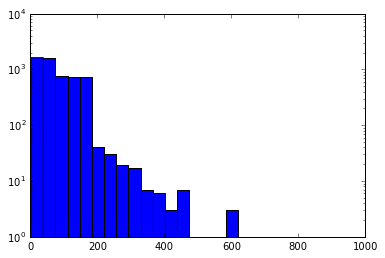

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(data.Length, log=True, bins=25)